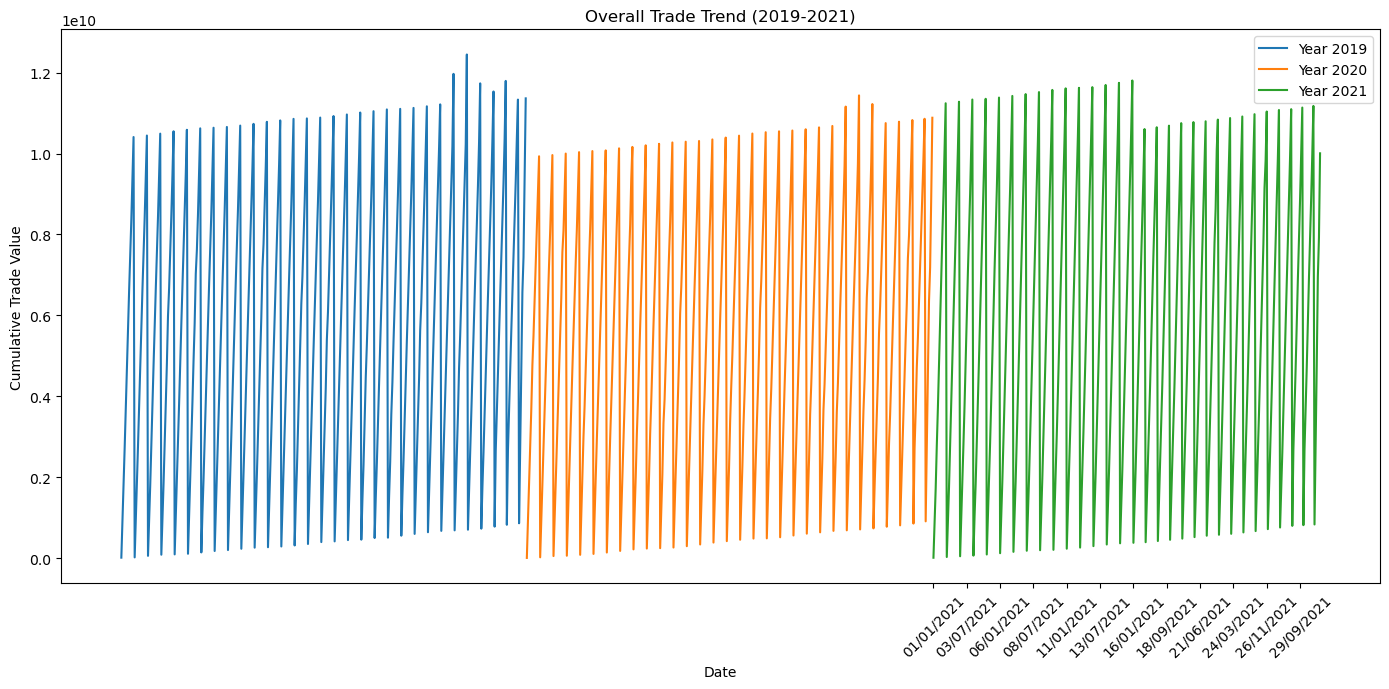

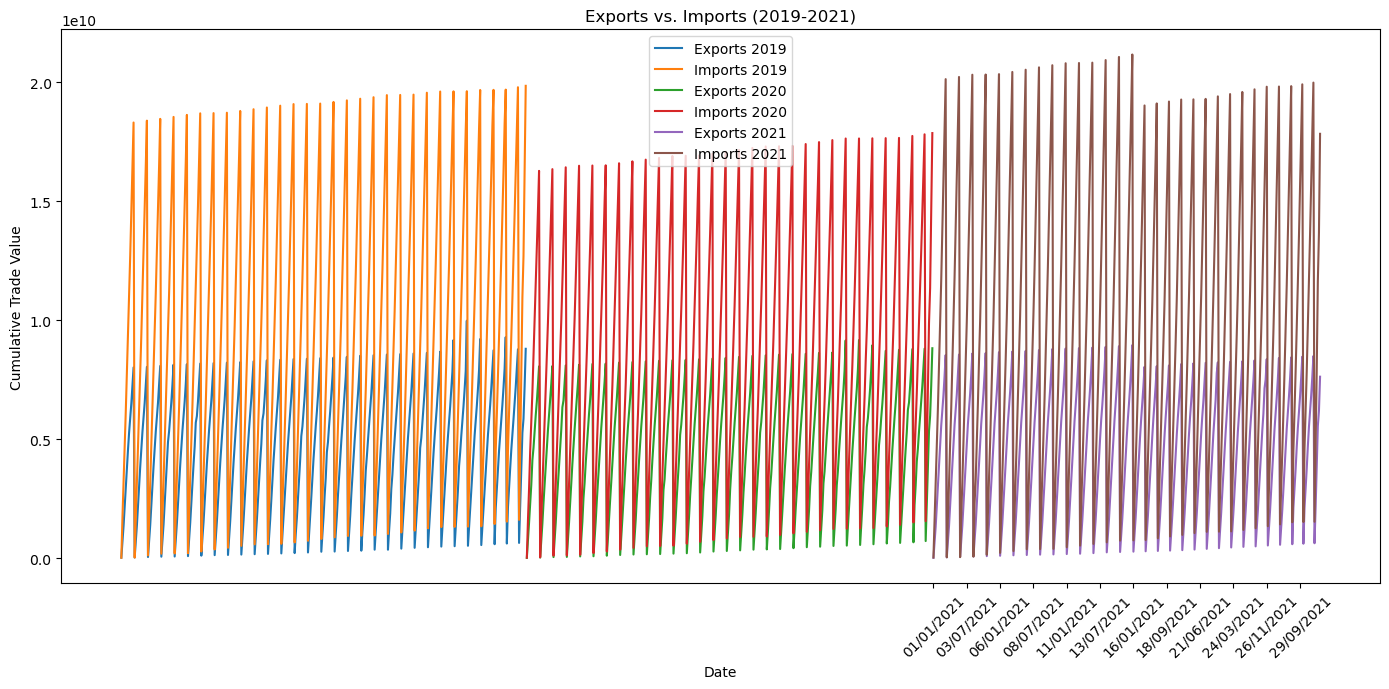

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  commodity_data['Change_2019_2020'] = commodity_data.groupby('Commodity').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  commodity_data['Ch

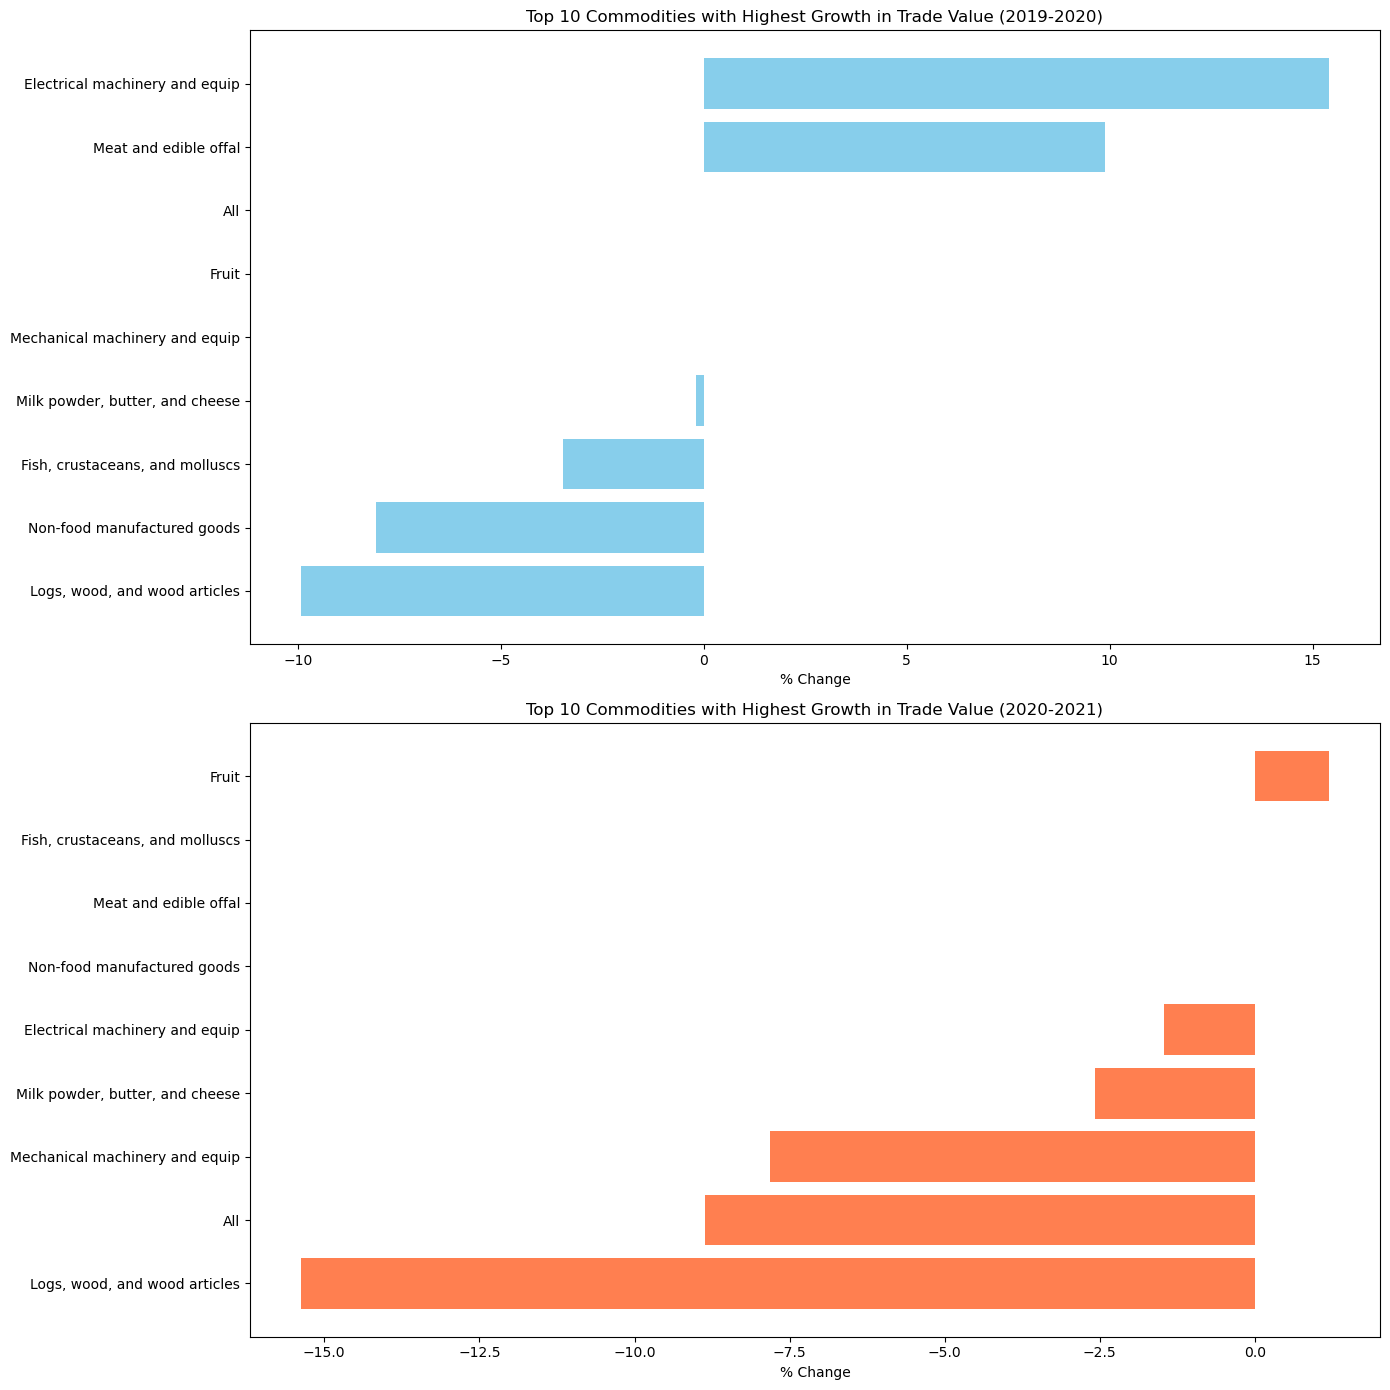

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transport_data['Change_2019_2020'] = transport_data.groupby('Transport_Mode').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transport_dat

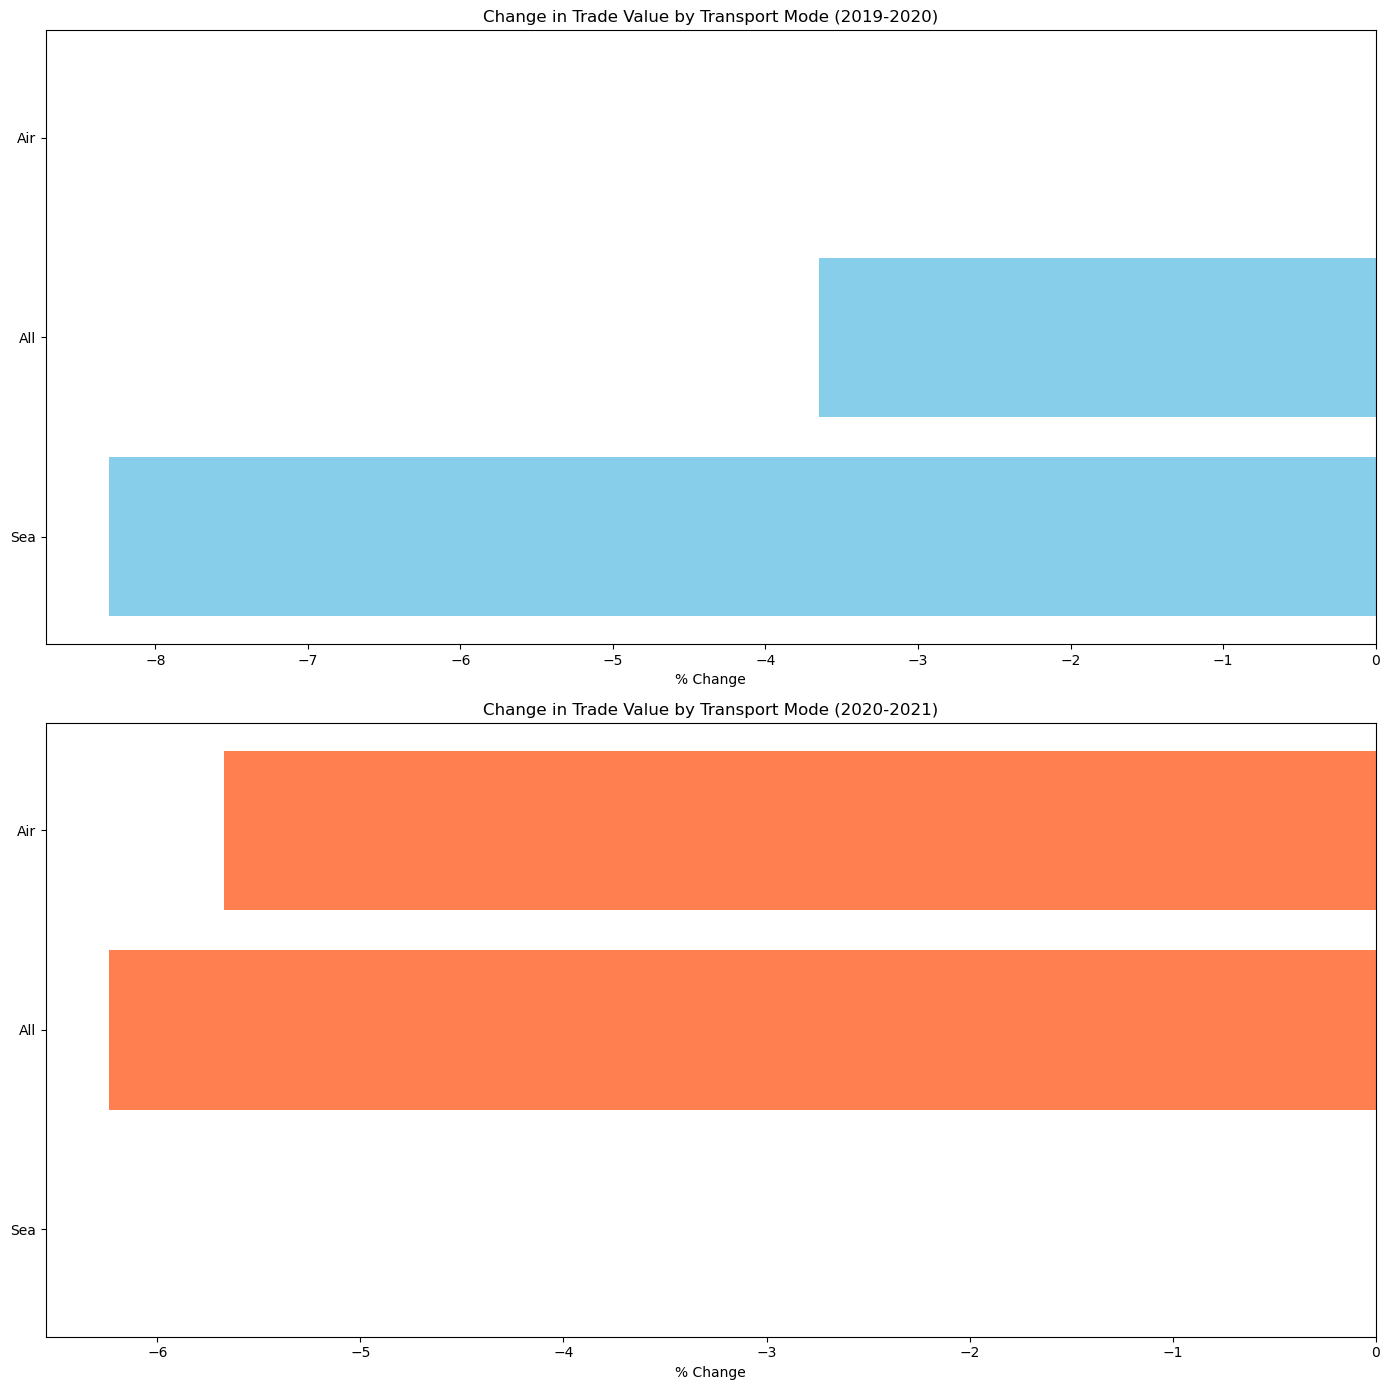

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:99: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_data['Change_2019_2020'] = country_data.groupby('Country').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_3106/3353865118.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_data['Change_20

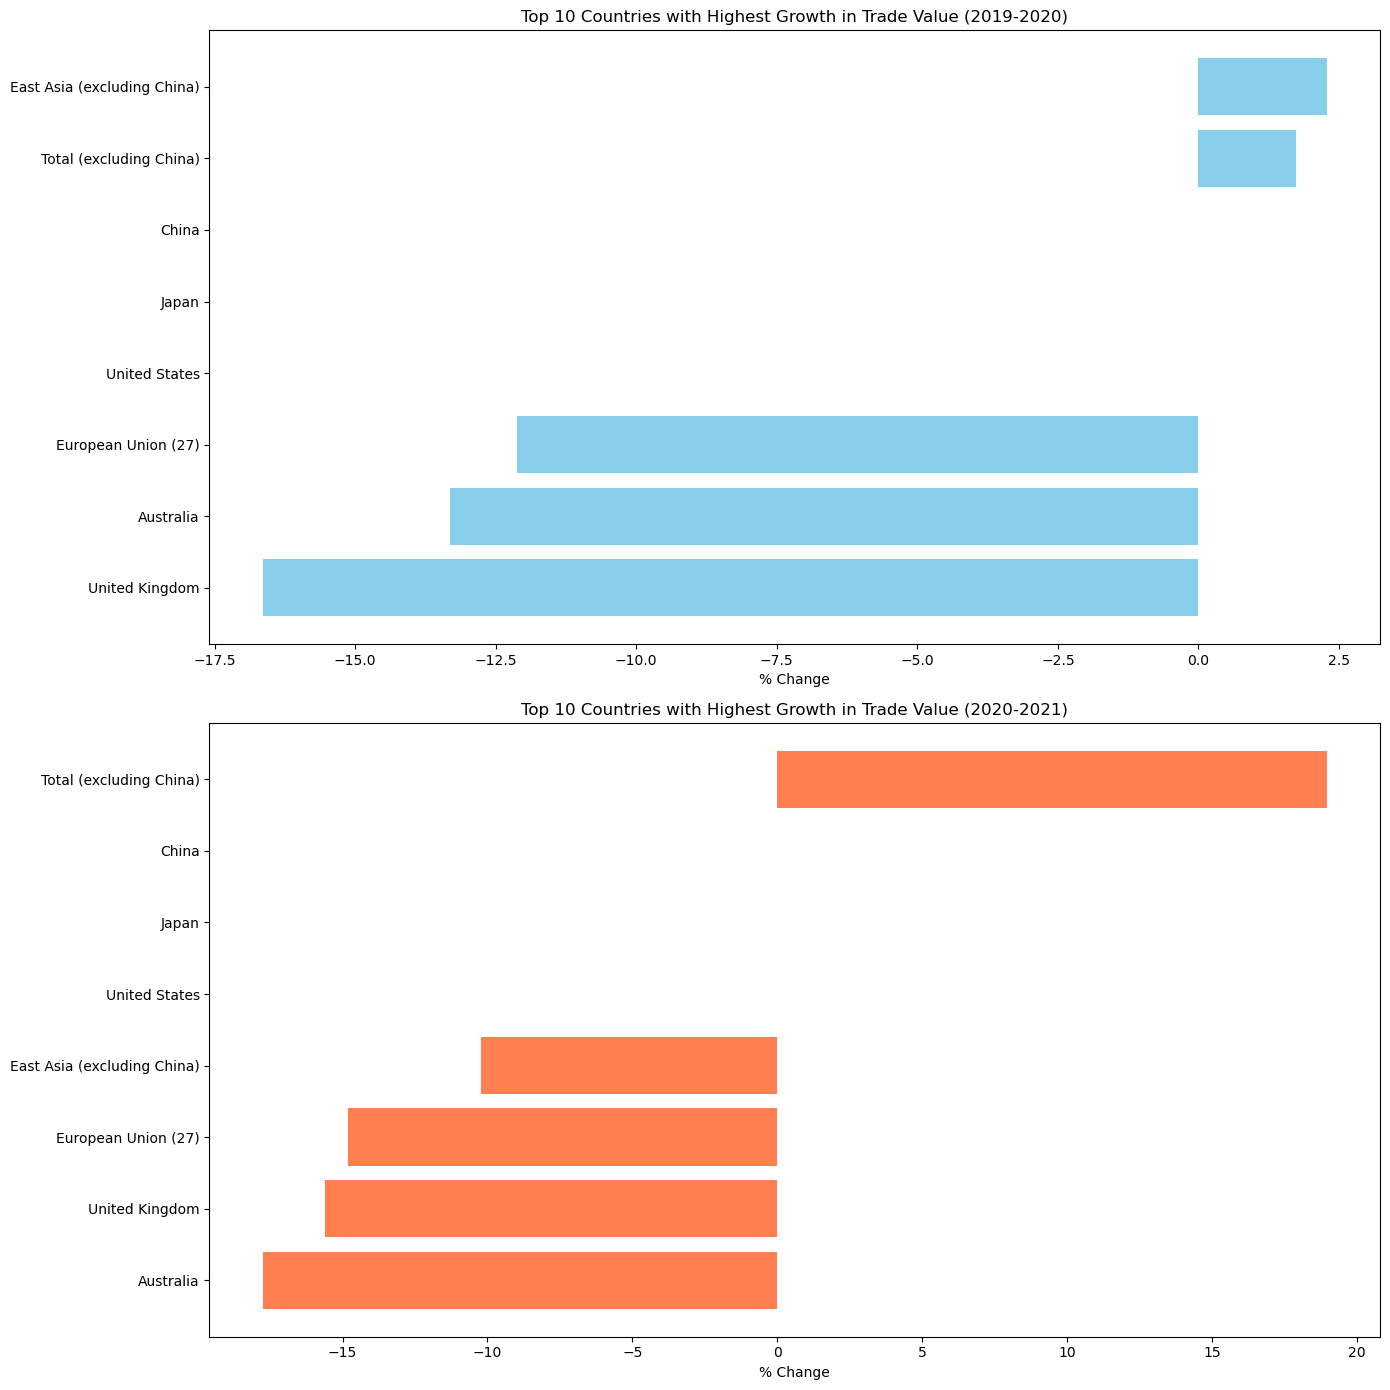

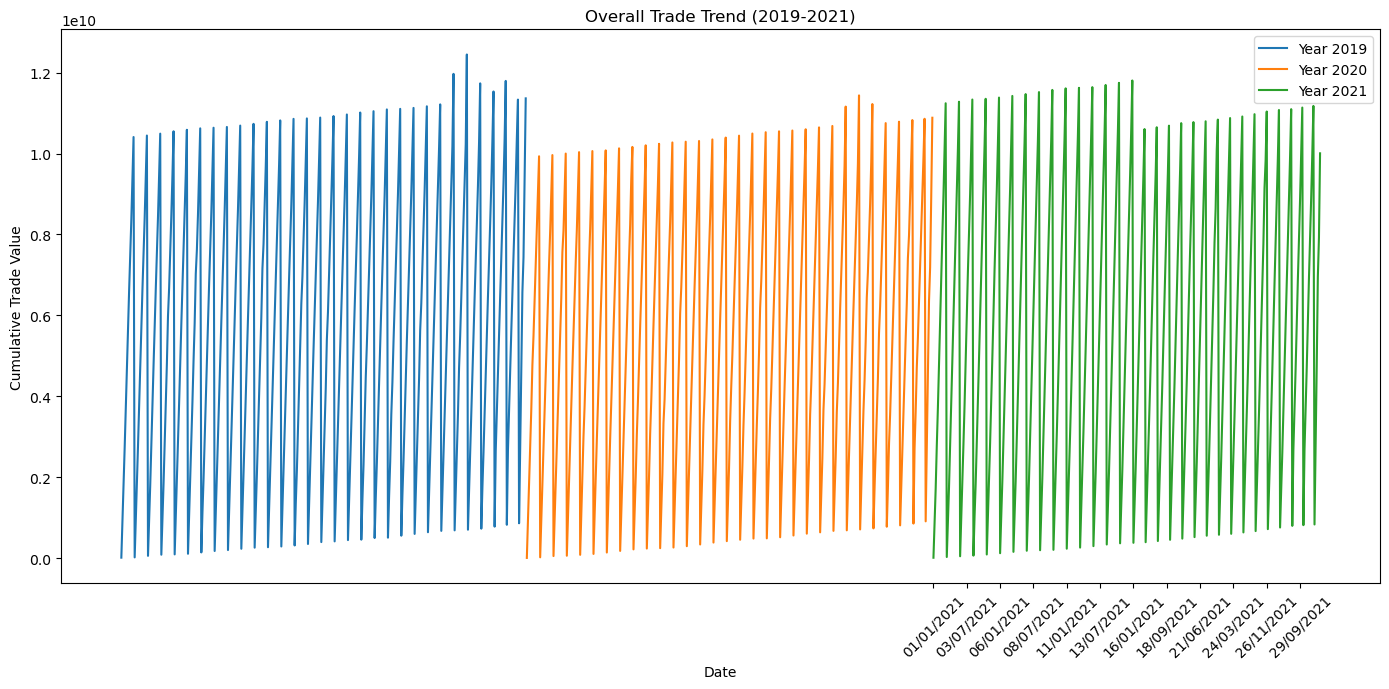

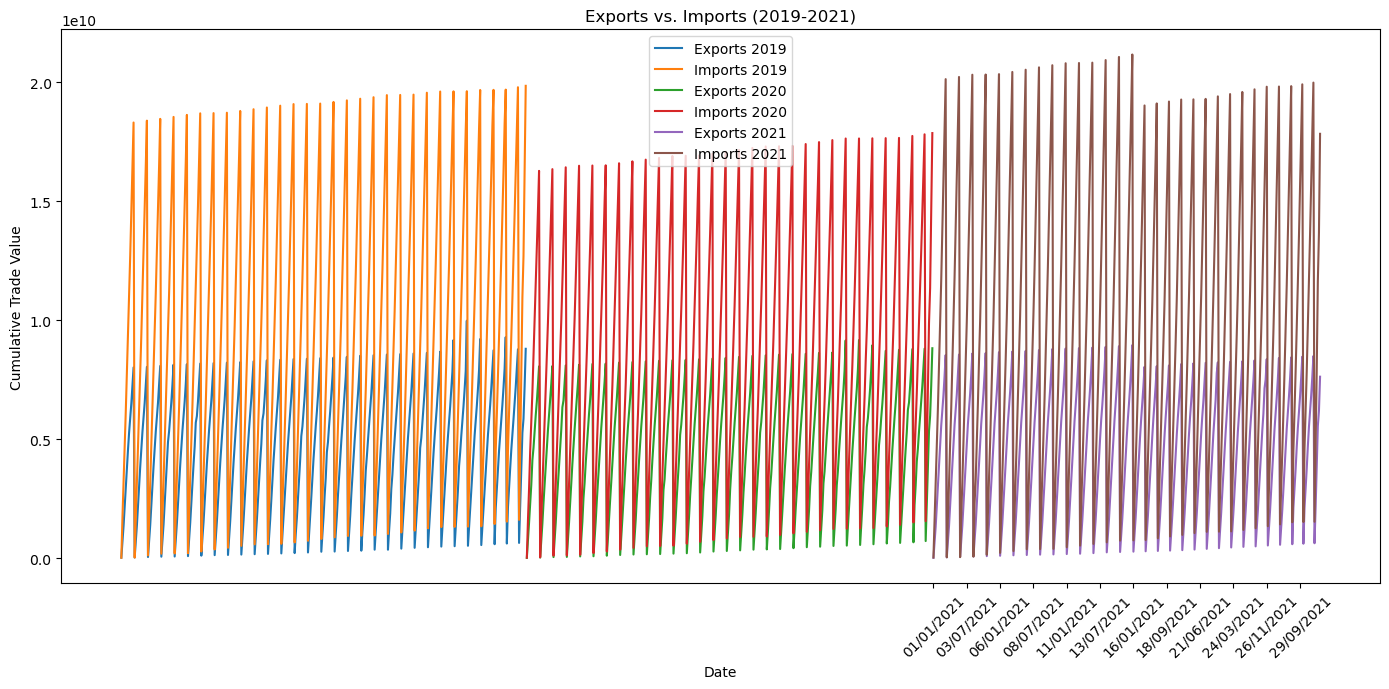

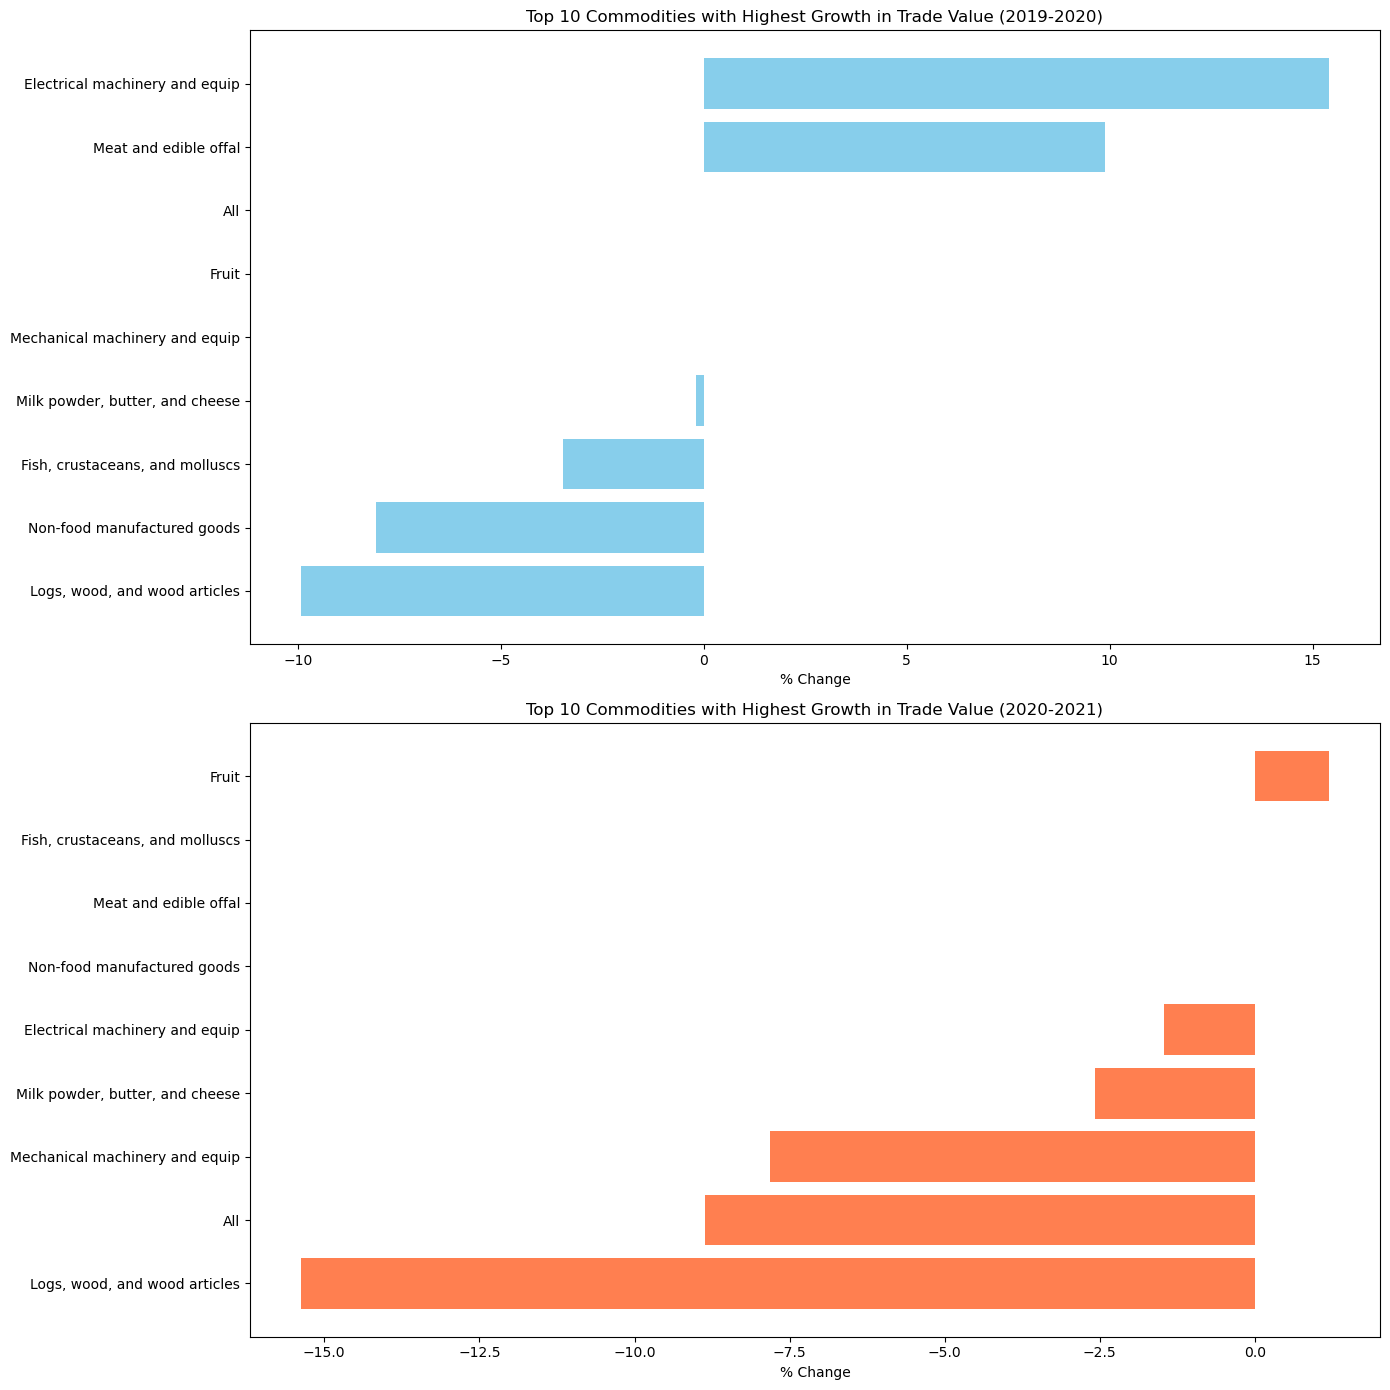

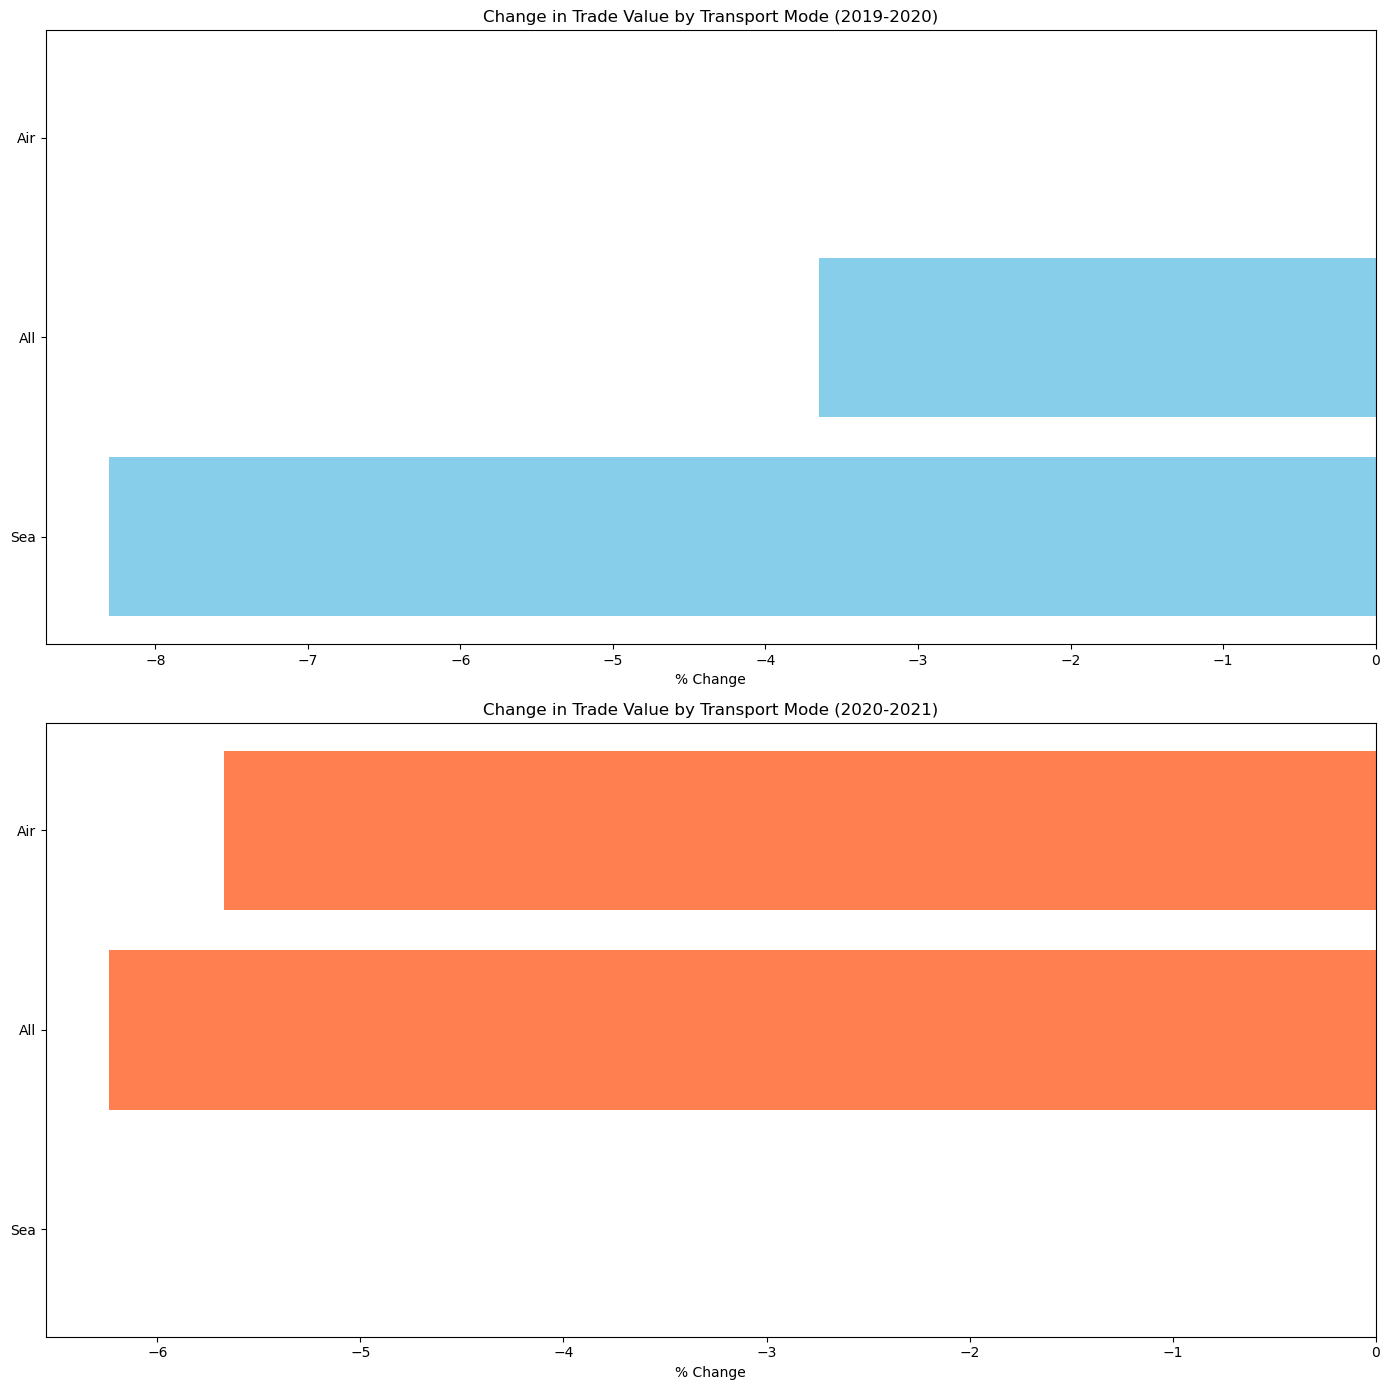

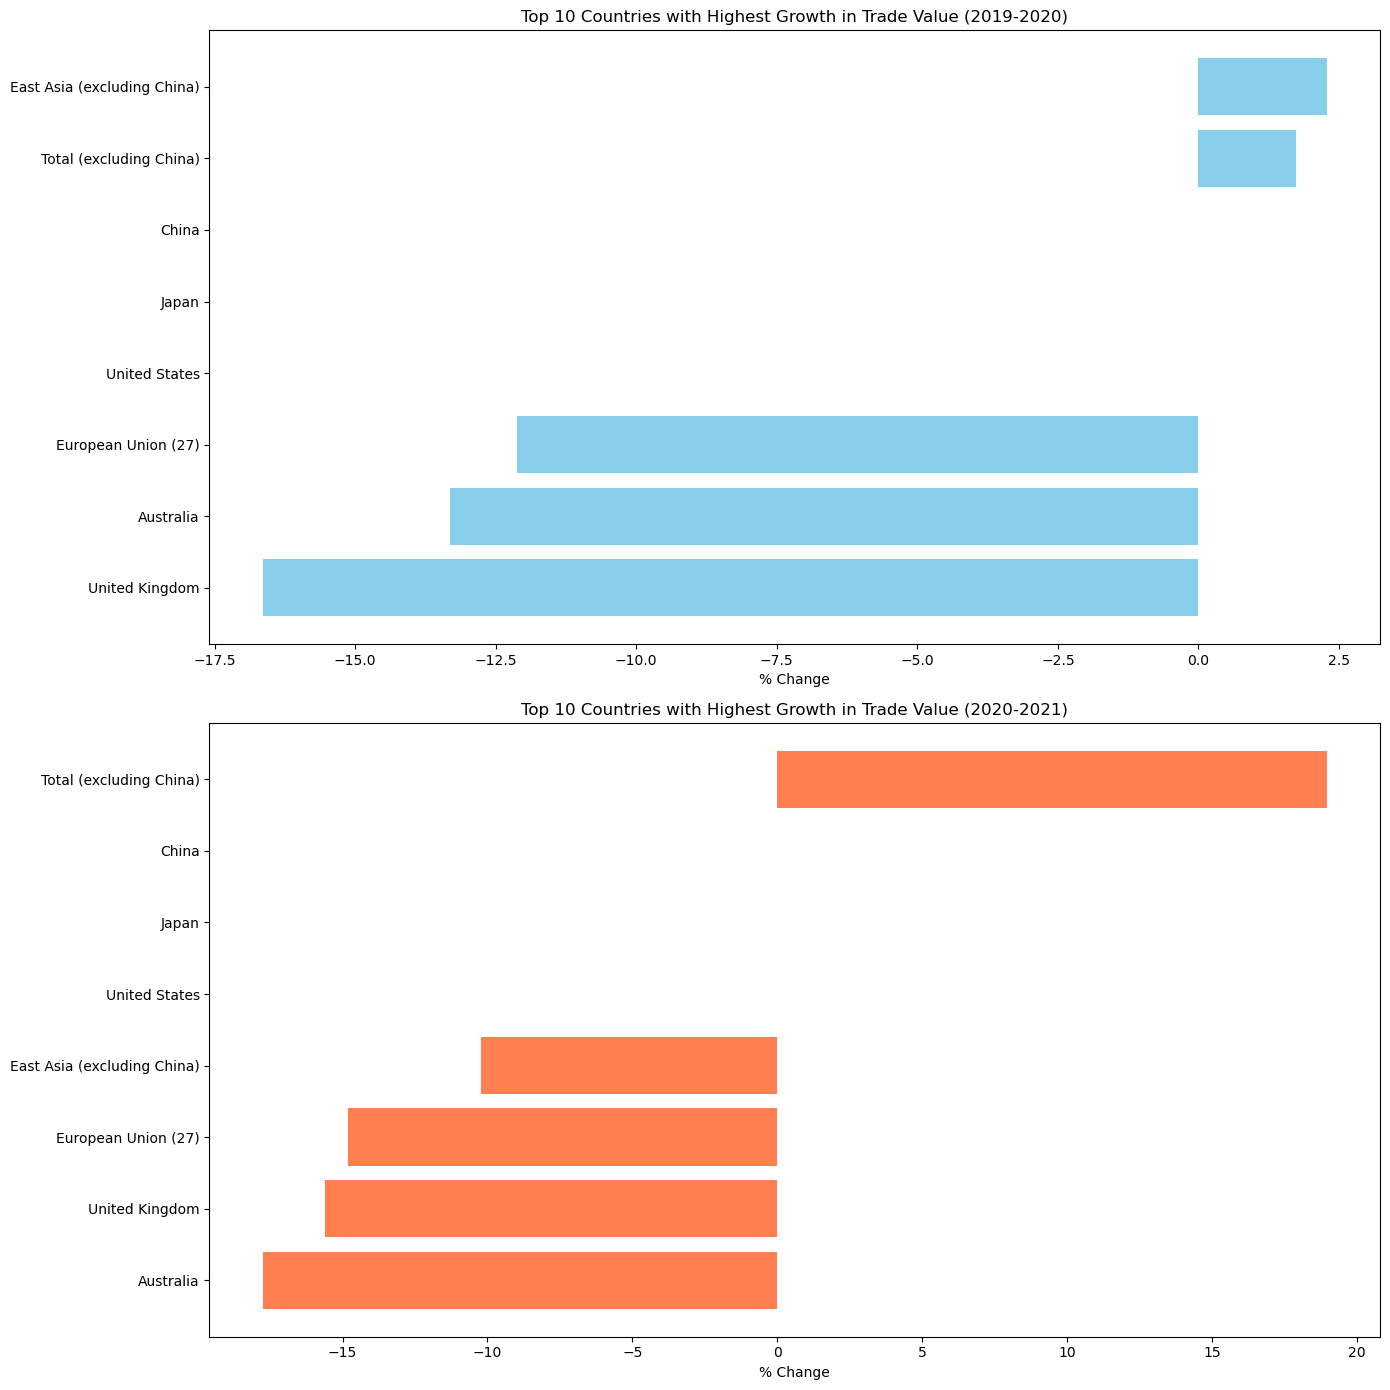

In [25]:



import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/sarish/Downloads/dataset-covid19-trade-impact 2.csv')

# Display the first few rows
data.head()
import matplotlib.pyplot as plt

# Filter data for the years 2019, 2020, and 2021
data_filtered = data[data['Year'].isin([2019, 2020, 2021])]

# Group by Year and Date and sum the cumulative values
grouped_data = data_filtered.groupby(['Year', 'Date'])['Cumulative'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    yearly_data = grouped_data[grouped_data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Cumulative'], label=f'Year {year}')

plt.title('Overall Trade Trend (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(yearly_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Group by Year, Date, and Direction and sum the cumulative values
grouped_direction = data_filtered.groupby(['Year', 'Date', 'Direction'])['Cumulative'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    for direction in ['Exports', 'Imports']:
        subset_data = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == direction)]
        plt.plot(subset_data['Date'], subset_data['Cumulative'], label=f'{direction} {year}')

plt.title('Exports vs. Imports (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(subset_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Group by Year, Commodity and sum the cumulative values for the last date of each year
last_dates = data_filtered.groupby('Year')['Date'].max().values
commodity_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Commodity'])['Cumulative'].mean().reset_index()

# Calculate change in trade value for each commodity between 2019-2020 and 2020-2021
commodity_data['Change_2019_2020'] = commodity_data.groupby('Commodity').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
commodity_data['Change_2020_2021'] = commodity_data.groupby('Commodity').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

# Filter for commodities with the most significant changes
top_commodities_2019_2020 = commodity_data[commodity_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)
top_commodities_2020_2021 = commodity_data[commodity_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].barh(top_commodities_2019_2020['Commodity'], top_commodities_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Commodities with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()

ax[1].barh(top_commodities_2020_2021['Commodity'], top_commodities_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Commodities with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()
# Group by Year, Transport_Mode and sum the cumulative values for the last date of each year
transport_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Transport_Mode'])['Cumulative'].mean().reset_index()

# Calculate change in trade value for each transport mode between 2019-2020 and 2020-2021
transport_data['Change_2019_2020'] = transport_data.groupby('Transport_Mode').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
transport_data['Change_2020_2021'] = transport_data.groupby('Transport_Mode').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].barh(transport_data[transport_data['Year'] == 2020]['Transport_Mode'], transport_data[transport_data['Year'] == 2020]['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Change in Trade Value by Transport Mode (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()

ax[1].barh(transport_data[transport_data['Year'] == 2021]['Transport_Mode'], transport_data[transport_data['Year'] == 2021]['Change_2020_2021']*100, color='coral')
ax[1].set_title('Change in Trade Value by Transport Mode (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()
# Group by Year, Country and sum the cumulative values for the last date of each year
country_data = data_filtered[data_filtered['Date'].isin(last_dates) & (data_filtered['Country'] != 'All')].groupby(['Year', 'Country'])['Cumulative'].mean().reset_index()

# Calculate change in trade value for each country between 2019-2020 and 2020-2021
country_data['Change_2019_2020'] = country_data.groupby('Country').apply(lambda x: x['Cumulative'].pct_change().fillna(0)).values
country_data['Change_2020_2021'] = country_data.groupby('Country').apply(lambda x: x['Cumulative'].pct_change().shift(-1).fillna(0)).values

# Filter for countries with the most significant changes
top_countries_2019_2020 = country_data[country_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)
top_countries_2020_2021 = country_data[country_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].barh(top_countries_2019_2020['Country'], top_countries_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Countries with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()

ax[1].barh(top_countries_2020_2021['Country'], top_countries_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Countries with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()
# Save the created visualizations to PNG format

# 1. Overall Trade Trend
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    yearly_data = grouped_data[grouped_data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Cumulative'], label=f'Year {year}')
plt.title('Overall Trade Trend (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(yearly_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/sarish/Downloads/overall_trade_trend.png")

# 2. Exports vs. Imports
plt.figure(figsize=(14, 7))
for year in [2019, 2020, 2021]:
    for direction in ['Exports', 'Imports']:
        subset_data = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == direction)]
        plt.plot(subset_data['Date'], subset_data['Cumulative'], label=f'{direction} {year}')
plt.title('Exports vs. Imports (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Trade Value')
plt.xticks(subset_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/sarish/Downloads/exports_vs_imports.png")

# 3. Top Commodities Affected
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_commodities_2019_2020['Commodity'], top_commodities_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Commodities with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_commodities_2020_2021['Commodity'], top_commodities_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Commodities with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig("/Users/sarish/Downloads/top_commodities_affected.png")

# 4. Transport Mode Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(transport_data[transport_data['Year'] == 2020]['Transport_Mode'], transport_data[transport_data['Year'] == 2020]['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Change in Trade Value by Transport Mode (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(transport_data[transport_data['Year'] == 2021]['Transport_Mode'], transport_data[transport_data['Year'] == 2021]['Change_2020_2021']*100, color='coral')
ax[1].set_title('Change in Trade Value by Transport Mode (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig("/Users/sarish/Downloads/transport_mode_analysis.png")

# 5. Country Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_countries_2019_2020['Country'], top_countries_2019_2020['Change_2019_2020']*100, color='skyblue')
ax[0].set_title('Top 10 Countries with Highest Growth in Trade Value (2019-2020)')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_countries_2020_2021['Country'], top_countries_2020_2021['Change_2020_2021']*100, color='coral')
ax[1].set_title('Top 10 Countries with Highest Growth in Trade Value (2020-2021)')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig("//Users/sarish/Downloads/country_analysis.png")

# List of saved PNG files
saved_files = [
    "/Users/sarish/Downloads/overall_trade_trend.png",
    "/Users/sarish/Downloads/exports_vs_imports.png",
    "/Users/sarish/Downloads/top_commodities_affected.png",
    "/Users/sarish/Downloads/transport_mode_analysis.png",
    "//Users/sarish/Downloads/country_analysis.png"
]


     